<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span>
    <li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li>
    <li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Откроем датасет и ознакомимся с данными при помощи методов info() и describe().

**Описание данных:**

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)<br>
balcony — число балконов<br>
ceiling_height — высота потолков (м)<br>
cityCenters_nearest — расстояние до центра города (м)<br>
days_exposition — сколько дней было размещено объявление (от публикации до снятия)<br>
first_day_exposition — дата публикации<br>
floor — этаж<br>
floors_total — всего этажей в доме<br>
is_apartment — апартаменты (булев тип)<br>
kitchen_area — площадь кухни в квадратных метрах (м²)<br>
last_price — цена на момент снятия с публикации<br>
living_area — жилая площадь в квадратных метрах (м²)<br>
locality_name — название населённого пункта<br>
open_plan — свободная планировка (булев тип)<br>
parks_around3000 — число парков в радиусе 3 км<br>
parks_nearest — расстояние до ближайшего парка (м)<br>
ponds_around3000 — число водоёмов в радиусе 3 км<br>
ponds_nearest — расстояние до ближайшего водоёма (м)<br>
rooms — число комнат<br>
studio — квартира-студия (булев тип)<br>
total_area — площадь квартиры в квадратных метрах (м²)<br>
total_images — число фотографий квартиры в объявлении<br>
Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.


In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None) #снимаем ограничения по количеству столбцов, выводимых на экран для длинного датесета
pd.set_option('display.float_format', '{:,.2f}'.format) #чтобы избавиться от лишних запятых при работе метода `describe` и убрать экспоненциальные формы

In [131]:
try:
        data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
        data = pd.read_csv('real_estate_data.csv', sep='\t')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [133]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


Посчитаем число пропусков в каждом столбце методом isna().

In [134]:
data.isna().mean()

total_images           0.00
last_price             0.00
total_area             0.00
first_day_exposition   0.00
rooms                  0.00
ceiling_height         0.39
floors_total           0.00
living_area            0.08
floor                  0.00
is_apartment           0.88
studio                 0.00
open_plan              0.00
kitchen_area           0.10
balcony                0.49
locality_name          0.00
airports_nearest       0.23
cityCenters_nearest    0.23
parks_around3000       0.23
parks_nearest          0.66
ponds_around3000       0.23
ponds_nearest          0.62
days_exposition        0.13
dtype: float64

### Вывод

Исходная таблица состоит из 22 столбцов и 23699 строк. 
Присутствуют разные типы данных: int64, float64, object, bool.
Название столбца cityCenters_nearest лучше изменить, используя нижний регистр.
В столбце first_day_exposition содержатся даты.
Есть пропуски в данных.
В таблице содержатся аномальные данные:
    минимальная высота потолков 1 м;
    максимальная высота потолков 100 м;
    количество комнат 0;
    количество балконов 0;
    расстояние до ближайшего аэропорта 0.
    
    

## Предобработка данных

Переименуем столбец 'cityCenters_nearest'.

In [135]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
data['city_centers_nearest'].head()

0   16,028.00
1   18,603.00
2   13,933.00
3    6,800.00
4    8,098.00
Name: city_centers_nearest, dtype: float64

**Обработаем пропуски.**

1. Заменим пропуски в столбце 'balcony'  на 0, т.к., если человек не указал число балконов — скорее всего, их нет.

In [136]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [137]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

2. Отсутствие значений в столбце 'is_apartment', вероятно, означает, что объект не является аппартаментами. Заменим пропуски на False.

In [138]:
display(data['is_apartment'].isna().sum())
data['is_apartment'].unique()

20924

array([nan, False, True], dtype=object)

In [139]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

In [140]:
data['is_apartment'].unique()

array([False,  True])

3. Пропуски в столбце 'parks_around3000' скорее всего означают отсутствие парков. Заменим пропуски на 0.

In [141]:
data['parks_around3000'].isna().sum()

5518

In [142]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'].isna().sum()

0

4. В столбце 'locality_name' содержится 49 пропусков. Это важные данные для исследования, а восстановить название населенных пунктов затруднительно и количество пропусков невелико поэтому удалим строки с пропусками.           

In [143]:
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

5. В столбце 'ceiling_height' содержится достаточно много пропусков, при этом основная часть значений различается не сильно:
медиана 2,77
среднее 2,6
1-й квартиль 2,52
3-й квартиль 2,8
Заменим пропуски на медианное значение, поскольку это значение наиболее приближено к реальным данным.          

In [144]:
ceiling_height_medium = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(value=ceiling_height_medium)
data['ceiling_height'].isna().sum()

0

6. В столбце 'floors_total' 86 пропусков. Этажность здания важна для исследования, восстановить значения невозможно. Удалим строки с пропусками.

In [145]:
data = data.dropna(subset=['floors_total'])
data['floors_total'].isna().sum()

0

In [146]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Остальные пропуски в данных оставим, т.к. восстановить пропущенные значения невозможно.

**Обработаем аномальные значения.**

Выведем уникальные значения столбца 'ceiling_height' по возрастанию. Посчитаем количество строк с аномальными значениями:
ниже 1.8 м и выше 6 м.

In [147]:
display(data['ceiling_height'].sort_values().unique())
display(data['ceiling_height'][data['ceiling_height']<1.8].count())
display(data['ceiling_height'][data['ceiling_height']>6].count())

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

3

29

Количество аномальных значений в столбце 'ceiling_height' мало. Вероятнее всего, при вводе данных возникли случайные ошибки.
Удалим строки с аномальными значениями.


In [148]:
data = data.loc[(data['ceiling_height'] > 1.8)&(data['ceiling_height'] < 6)]
display(data['ceiling_height'].sort_values().unique())

array([2.  , 2.2 , 2.25, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48, 2.49,
       2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 ,
       2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71,
       2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82,
       2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93,
       2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04,
       3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15,
       3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27,
       3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38,
       3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62,
       3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 ,
       3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95, 3.98,
       4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.2 , 4.

Рассмотрим столбец 'rooms'.
Сгруппируем данные по количеству комнат и посчитаем количество квартир с различным числом комнат.

In [149]:
#data.groupby('rooms')[['rooms']].count()
data['rooms'].value_counts()

1     7994
2     7882
3     5774
4     1170
5      325
0      193
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Больше 7 комнат встречается у небольшого числа квартир. Удалим эти данные, т.к. на их основе не удастся дать объективную оценку.

In [150]:
data = data[data['rooms']<8]
data.groupby('rooms')[['rooms']].count()

,rooms
rooms,
0,193
1,7994
2,7882
3,5774
4,1170
5,325
6,104
7,59


Проверим на аномалии столбец 'last-price' при помощи диаграммы размаха.

(-1000000.0, 150000000.0)

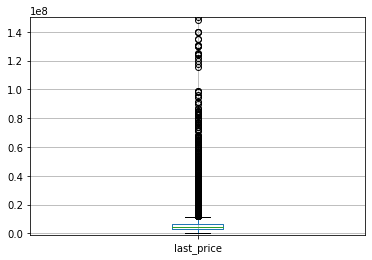

In [151]:
data.boxplot('last_price')
plt.ylim(-1000000, 150000000)

In [152]:
# количество аномальных значений
data['last_price'][data['last_price']>100000000].count()
# их доля от общего числа
data['last_price'][data['last_price']>100000000].count()/data['last_price'].count()

0.0014041955661461215

По диаграмме размаха виден небольшой разрыв после 10 млн. руб, выше находятся всего 33 значения, что составляет около 1,7%. Возможно, причина такой стоимости квартир -- ошибка при заполнении. Удалим аномальные значения.

In [153]:
data = data[data['last_price']<100000000]
data = data[data['last_price']>12000]

Вычислим, какую долю значений удалили в результате обработки (изначально в таблице было 23699 строк)

In [154]:
display(1 - data['last_price'].count()/23699)

0.009747246719270852

К данному этапу удалено 9,7% данных. 

**Изменение типов данных**

Изменим типы данных в столбцах:
1. 'is_apartment' на bool (сначала мы заменили пропуски на 'False' строкового типа), т.к. в столбце содержаться только два типа значений True и False; 
2. 'first_day_exposition' на datetime, чтобы дата отображалась в более удобном формате.

In [155]:
data['is_apartment'] = data['is_apartment'].fillna('False')
#data['is_apartment'] = data['is_apartment'].astype('bool')
data[['is_apartment']].dtypes

is_apartment    bool
dtype: object

In [156]:
#data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
#data['first_day_exposition'] = data['first_day_exposition'].dt.strftime('%d.%m.%Y')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу столбец, содержащий цену квадратного метра.

In [157]:
data['price_per_sqr_m'] = data['last_price']/data['total_area']
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqr_m
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37"
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79"
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71"
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,NaN,9,False,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10"
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00"
5,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12.00,14.40,5,False,False,False,9.10,0.00,городской посёлок Янино-1,NaN,NaN,0.00,NaN,NaN,NaN,55.00,"95,065.79"
6,6,"3,700,000.00",37.30,2017-11-02,1,2.65,26.00,10.60,6,False,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00,"99,195.71"
7,5,"7,915,000.00",71.60,2019-04-18,2,2.65,24.00,NaN,22,False,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN,"110,544.69"
8,20,"2,900,000.00",33.16,2018-05-23,1,2.65,27.00,15.43,26,False,False,False,8.81,0.00,посёлок Мурино,NaN,NaN,0.00,NaN,NaN,NaN,189.00,"87,454.76"
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9.00,43.60,7,False,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00,"88,524.59"


Добавим столбцы, содержащие день недели, месяц и год публикации объявления

In [158]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Добавим столбец, содержащий соотношение жилой и общей площади.

In [159]:
data['living/total_area'] = data['living_area']/data['total_area']

Добавим столбец, содержащий отношение площади кухни к общей.

In [160]:
data['kitchen/total_area'] = data['kitchen_area']/data['total_area']

Добавим столбец с этажем квартиры, варианты — первый, последний, другой

In [161]:
def floor_category(floor_number):
    
    if floor_number.loc['floor'] == 1:
        return 'первый'
    elif floor_number.loc['floor'] == floor_number.loc['floors_total']:
        return 'последний'
    else:
        return 'другой'


data['floor_category'] = data.apply(floor_category, axis=1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqr_m,weekday,month,year,living/total_area,kitchen/total_area,floor_category
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",3,3,2019,0.47,0.23,другой
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",1,12,2018,0.46,0.27,первый
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",3,8,2015,0.61,0.15,другой
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,NaN,9,False,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",4,7,2015,NaN,NaN,другой
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",1,6,2018,0.32,0.41,другой
5,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12.00,14.40,5,False,False,False,9.10,0.00,городской посёлок Янино-1,NaN,NaN,0.00,NaN,NaN,NaN,55.00,"95,065.79",0,9,2018,0.47,0.30,другой
6,6,"3,700,000.00",37.30,2017-11-02,1,2.65,26.00,10.60,6,False,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00,"99,195.71",3,11,2017,0.28,0.39,другой
7,5,"7,915,000.00",71.60,2019-04-18,2,2.65,24.00,NaN,22,False,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN,"110,544.69",3,4,2019,NaN,0.26,другой
8,20,"2,900,000.00",33.16,2018-05-23,1,2.65,27.00,15.43,26,False,False,False,8.81,0.00,посёлок Мурино,NaN,NaN,0.00,NaN,NaN,NaN,189.00,"87,454.76",2,5,2018,0.47,0.27,другой
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9.00,43.60,7,False,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00,"88,524.59",6,2,2017,0.71,0.11,другой


## Исследовательский анализ данных

### Исследование всех квартир из датасета

При помощи метода describe() получим данные об общей площади, цене, количестве комнат и  высоте потолков.

In [162]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,"23,468.00","23,468.00","23,468.00","23,468.00"
mean,59.64,"6,221,434.09",2.06,2.70
std,32.44,"6,354,973.57",1.03,0.22
min,12.00,"12,190.00",0.00,2.00
25%,40.00,"3,400,000.00",1.00,2.60
50%,52.00,"4,600,000.00",2.00,2.65
75%,69.30,"6,750,000.00",3.00,2.70
max,517.00,"99,000,000.00",7.00,5.80


Построим гистограмму для каждого из этих столбцов.

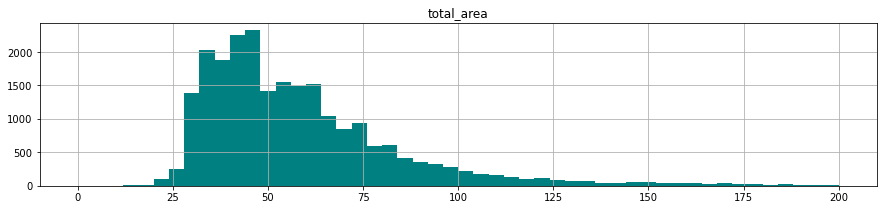

In [220]:
data.hist('total_area',
          bins=50, 
          range=(0,200), 
          figsize=(15,3),
          color='teal');

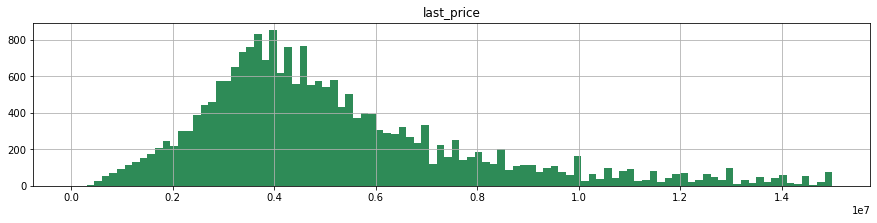

In [215]:
data.hist('last_price',
          bins=100, 
          range=(0, 15000000), 
          figsize=(15,3),
          color='seagreen');

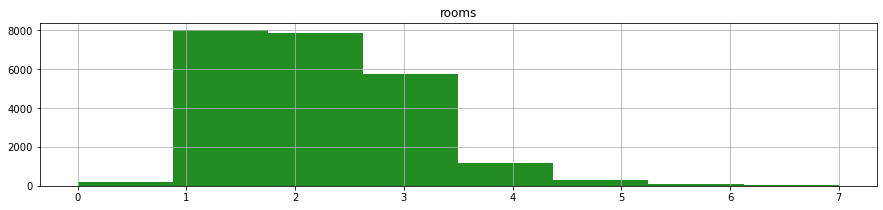

In [222]:
data.hist('rooms',
          bins=8, 
          range=(0,7), 
          figsize=(15,3),
          color='forestgreen');

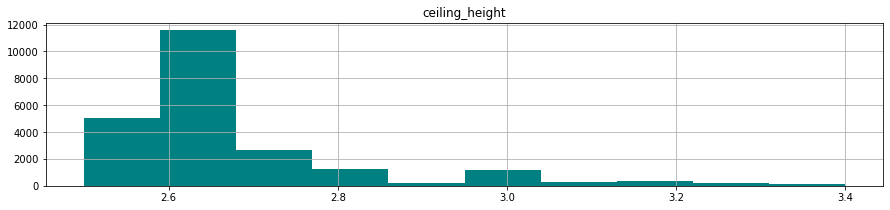

In [229]:
data.hist('ceiling_height',
          bins=10, 
          range=(2.5,3.4), 
          figsize=(15,3),
          color='teal');

Вывод: в результате анализа видно, что для большинства квартир в Ленинградской области характерны следующие медианные значения:

общая площадь 52 кв.м;

цена 4,6 млн. руб.;

количество комнат 2 (разница между одно- и двухкомнатными квартирами незначительна, трехкомнатных квартир немного меньше);

высота потолков 2,65 м.


## Время продажи квартиры

Изучим время продажи квартиры при помощи метода describe() и диаграммы размаха.
Построим гистограмму.

In [167]:
data[['days_exposition']].describe()

,days_exposition
count,"20,315.00"
mean,180.31
std,219.32
min,1.00
25%,45.00
50%,95.00
75%,230.00
max,"1,580.00"


(-10.0, 600.0)

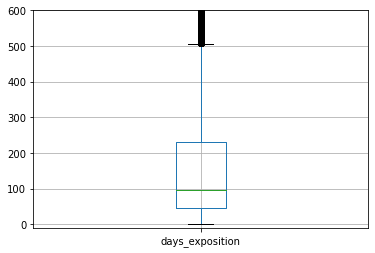

In [168]:
data.boxplot('days_exposition')
plt.ylim(-10, 600)

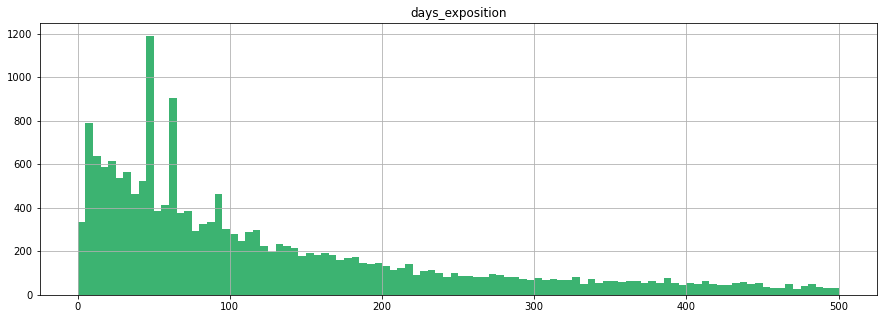

In [239]:
data.hist('days_exposition', 
          bins=100, 
          range=(0,500),
          figsize=(15,5),
          color='mediumseagreen');

Среднее значение: 180 дней
Медианное значение: 95 дней

В результате анализа видно, что большинство квартир в Ленинградской области продается в период от 45 до 230 дней.
Если квартира продана быстрее, чем за 45 дней, можно считать, что продажа прошла очень быстро. Продажи, занявшие более 230 дней можно считать достаточно долгими.
((Также имеются выбросы и выбивающиеся значения. Избавимся от них.))

((Удалим выбросы: продажи, длившиеся более 520 дней (их доля мала и составляет около 8 процентов) и после этого снова проанализируем результаты.))

In [170]:
data[['days_exposition']].describe()

,days_exposition
count,"20,315.00"
mean,180.31
std,219.32
min,1.00
25%,45.00
50%,95.00
75%,230.00
max,"1,580.00"


**Выводы по обновленным данным**:

Среднее значение: 180 день
Медианное значение: 95 дней

В результате анализа видно, что большинство квартир в Ленинградской области продается в период от 45 до 230 дней.
Если квартира продана быстрее, чем за 45 дней, можно считать, что продажа прошла очень быстро. Продажи, занявшие более 230 дней можно считать достаточно долгими.

В данных видны следующие особенности: 
на гистограмме по столбцу days_exposition видны несколько больших пиков в период от 0 до 100 дней. Возможно, наличие пиков связано с особенностями работы сайта.



## Какие факторы больше всего влияют на стоимость квартиры?**

При помощи графиков, построенных методом plot(), изучим, зависит ли цена от 

площади 'total_area ', 

числа комнат 'rooms', 

удалённости от центра 'city_centers_nearest'.   

 ### Зависимость стоимости квартиры от площади
 
 Построим график при помощи метода plot().

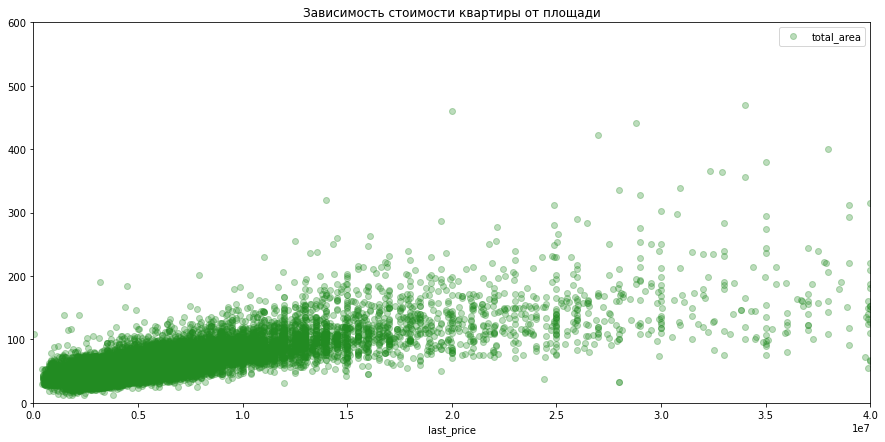

In [243]:
data.plot(title='Зависимость стоимости квартиры от площади', 
          x='last_price', 
          y='total_area', 
          style='o', 
          alpha=0.3, 
          color='forestgreen',
          xlim=(0,40000000), 
          ylim=(0,600),
          figsize=(15,7));

 Вывод: прослеживается зависимость роста цены с ростом площади, однако видно большое рассеяние, означающее, что есть небольшие дорогие квартиры и есть большие дешевые. Скорее всего, на стоимость квартиры влияют также и другие факторы, которые будут рассмотрены далее.

 ### Зависимость стоимости квартиры от количества комнат
 Сгруппируем данные по количеству комнат при помощи метода groupby(), для кажной группы посчитаем медианное значение, визуализируем результат методом plot().

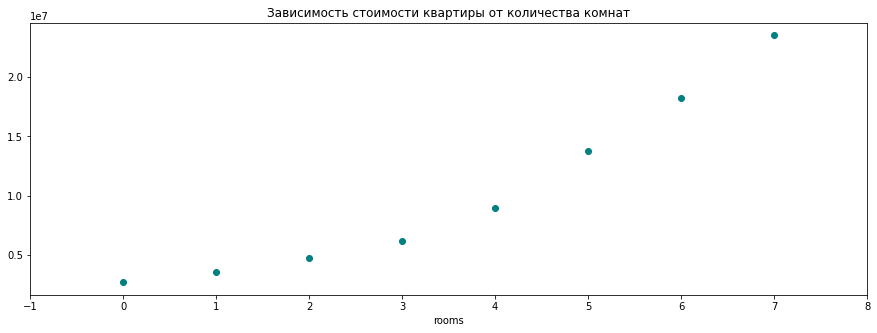

In [172]:
data.groupby('rooms')['last_price'].median().plot(title='Зависимость стоимости квартиры от количества комнат', 
                                                  x='last_price', 
                                                  style='o', 
                                                  y='rooms', 
                                                  color='teal',
                                                  xlim=(-1,8),
                                                 figsize=(15,5));

     Вывод: цены на квартиры с бОльшим количестом комнат выше, более резко возрастают цены на квартиры, в которых больше 4х комнат. 

 ### Зависимость стоимости квартиры от этажа
 
 Сгруппируем данные по количеству этажу при помощи метода groupby(), для кажной группы посчитаем медианное значение, визуализируем результат методом plot().

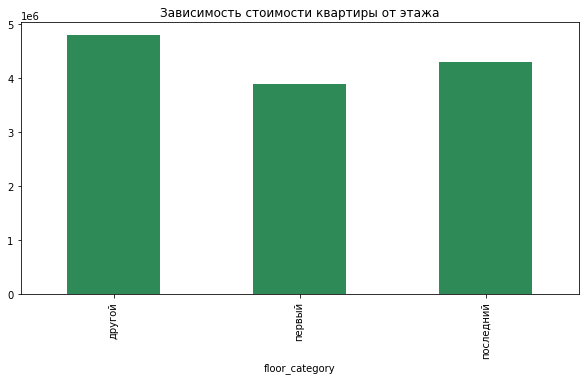

In [240]:
data.groupby('floor_category')['last_price'].median().plot(title='Зависимость стоимости квартиры от этажа',
                                                           y='last_price', 
                                                           x='floor_category', 
                                                           kind='bar',
                                                           color='seagreen',
                                                           figsize=(10,5));

**Вывод:** самые низкие цены на квартиры, расположенные на первом этаже, на картиры на последнем этаже цены чуть выше. На других этажах цены выше.

### Зависимость от даты размещения: дня недели, месяца и года

Сгруппируем данные по дню недели, месяцу и году при помощи метода groupby(), для кажной группы посчитаем медианное значение, визуализируем результат методом plot().

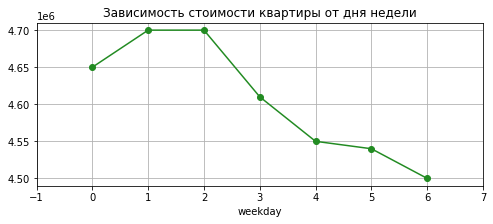

In [245]:
data.groupby('weekday')['last_price'].median().plot(title='Зависимость стоимости квартиры от дня недели', 
                                                    y='last_price', 
                                                    x='floor_category', 
                                                    style='o-', 
                                                    figsize=(8,3), 
                                                    xlim=(-1,7),
                                                    color='forestgreen',
                                                    grid=True);

**Вывод:** максимальные цены у квартир, объявления о продаже которых размещены в субботу и понедельниик. Миниальная стоимость - во вторник и воскресенье. 
Возможно, такая закономерность связана с тем, что объявления обычно размещаются в первый рабочий день недели и первый выходной день, на следующий день заметно резкое падение цен.

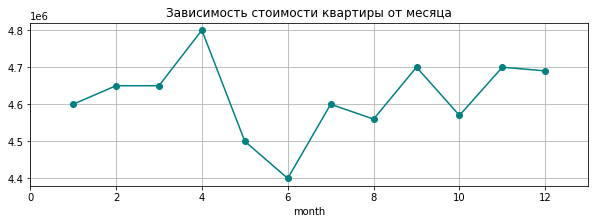

In [175]:
data.groupby('month')['last_price'].median().plot(title='Зависимость стоимости квартиры от месяца',
                                                  y='last_price', 
                                                  x='floor_category', 
                                                  style='o-', 
                                                  figsize=(10,3), 
                                                  xlim=(0,13), 
                                                  color='teal',
                                                  grid=True);

**Вывод:** наблюдается снижение стоимости квартир к июнь и рост цен к концу года ноябре и декабре.

<AxesSubplot:title={'center':'Зависимость стоимости квартиры от года размещения объявления'}, xlabel='year'>

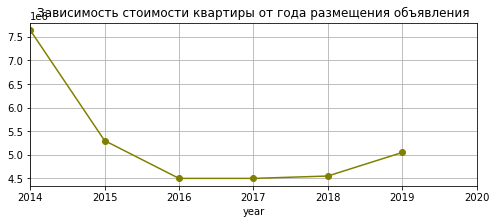

In [176]:
data.groupby('year')['last_price'].median().plot(title='Зависимость стоимости квартиры от года размещения объявления', 
                                                 y='last_price', 
                                                 x='floor_category', 
                                                 style='o-', 
                                                 figsize=(8,3), 
                                                 xlim=(2014, 2020),
                                                 color='olive',
                                                 grid=True)

По графику видно, что в 2016-2018 годах медианная стоимость квартир снижавется примерно на 400 тыс. рублей, в 2019 снова возрастает.

Возможно, это связано с другими характеристиками квартир: площадь, расположение и т.д.

Более показательной будет зависимост стоимости квадратного метра от года. Построим его аналогичным способом.

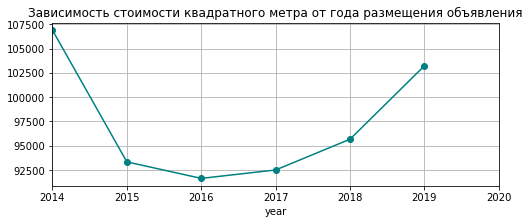

In [177]:
data.groupby('year')['price_per_sqr_m'].median().plot(title='Зависимость стоимости квадратного метра от года размещения объявления', 
                                                      y='last_price', 
                                                      x='floor_category', 
                                                      style='o-', 
                                                      figsize=(8,3), 
                                                      xlim=(2014, 2020),
                                                      color='teal',
                                                      grid=True);

**Вывод:** с каждым годом наблюдается повышение стоимости квадратного метра квартир, также заметно, что скорость роста цен также цвеличивается.

### Матрица корреляций
Для создания матрицы корреляций выделим в отдельную таблицу колонки с параметрами, которые могли бы повлиять на цену:
* общая площадь
* количество комнат
* высота потолков
* жилая площадь
* расстояние до парка
* расстояние до пруда

In [178]:
data_corr = data[['last_price','total_area', 'rooms','ceiling_height','living_area', 'parks_nearest', 'city_centers_nearest', 'ponds_nearest','price_per_sqr_m']]
data_corr.corr()

,last_price,total_area,rooms,ceiling_height,living_area,parks_nearest,city_centers_nearest,ponds_nearest,price_per_sqr_m
last_price,1.00,0.77,0.46,0.40,0.68,-0.02,-0.30,-0.12,0.72
total_area,0.77,1.00,0.76,0.40,0.94,-0.02,-0.23,-0.10,0.25
rooms,0.46,0.76,1.00,0.23,0.84,-0.06,-0.18,-0.05,0.01
ceiling_height,0.40,0.40,0.23,1.00,0.38,-0.06,-0.29,-0.11,0.30
living_area,0.68,0.94,0.84,0.38,1.00,-0.05,-0.23,-0.08,0.16
parks_nearest,-0.02,-0.02,-0.06,-0.06,-0.05,1.00,-0.04,0.00,0.02
city_centers_nearest,-0.30,-0.23,-0.18,-0.29,-0.23,-0.04,1.00,0.03,-0.36
ponds_nearest,-0.12,-0.10,-0.05,-0.11,-0.08,0.00,0.03,1.00,-0.11
price_per_sqr_m,0.72,0.25,0.01,0.30,0.16,0.02,-0.36,-0.11,1.00


**Вывод:** прослеживается корреляция между ценой и общей площадью (0,76), количеством комнат (0,32), высотой потолков (0,37), жилой площалью (0,66), расстоянием до центра (-0.29);

также есть слабя корреляция между выстотй потоков (0,27), общей площадью (0,22), расстоянием до центра (-0,37).

## 10 населённых пунктов с наибольшим числом объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений посчитаем среднюю цену квадратного метра в этих населённых пунктах.

Выделитм среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

Получим список населенных пунктов с наибольшим числом объявлений. Для этого применим метод groupby() к столбцу с названиями населенных пунктов и отсортируем данные по убыванию количества объявлений.

In [179]:
data.groupby('locality_name')['price_per_sqr_m'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      15568
посёлок Мурино         518
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                337
посёлок Парголово      327
Гатчина                306
деревня Кудрово        299
Выборг                 237
Name: price_per_sqr_m, dtype: int64

Сохраним данные об этих населенных пунктах в отдельный датает, для этого сначала создадим список с названиями 10 интересующих населенных пунктов locality10. После этого создадим датафрейм data10, содержащий информацию обо всех объектах в населенных пунктах из списка locality10.

In [180]:
locality10=data['locality_name'].value_counts().head(10).index.tolist()
data10 = data[data['locality_name'].isin(locality10)]
data10.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqr_m,weekday,month,year,living/total_area,kitchen/total_area,floor_category
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",3,3,2019,0.47,0.23,другой
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",1,12,2018,0.46,0.27,первый
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",3,8,2015,0.61,0.15,другой
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,NaN,9,False,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",4,7,2015,NaN,NaN,другой
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",1,6,2018,0.32,0.41,другой


Сгруппируем данные по населенному пункту и получим среднюю цену за квадратный метр в каждом населенном пункте. Выведем значения по убыванию цены. Построим график.

In [181]:
data10 = data10.groupby('locality_name')['price_per_sqr_m'].mean().sort_values(ascending=False)
data10

locality_name
Санкт-Петербург     113,606.50
Пушкин              103,125.82
деревня Кудрово      92,473.55
посёлок Парголово    90,175.91
посёлок Мурино       85,645.90
посёлок Шушары       78,551.34
Колпино              75,333.30
Гатчина              68,757.68
Всеволожск           68,654.47
Выборг               58,141.91
Name: price_per_sqr_m, dtype: float64

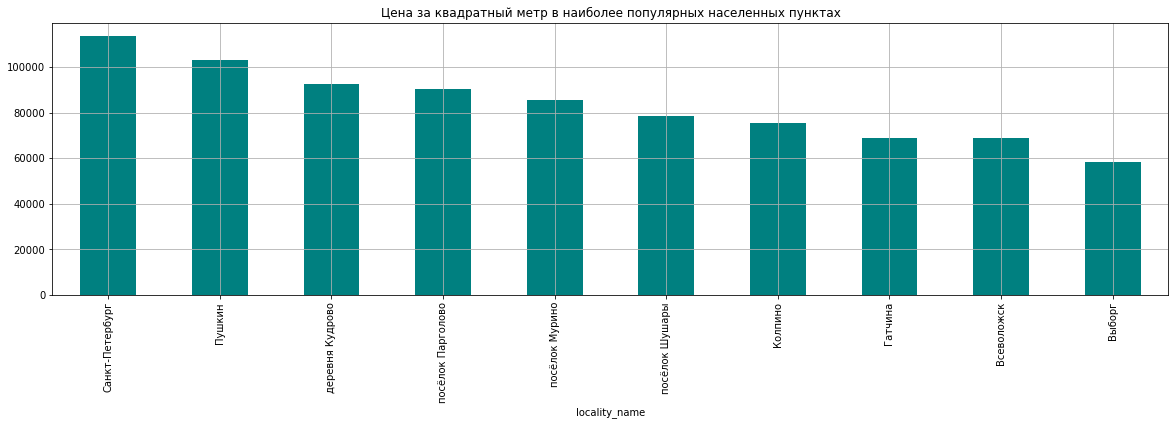

In [182]:
#data10.plot(title='Цена за квадратный метр в наиболее популярных населенных пунктах', x='locality_name', y='price_per_sqr_m', style='o-', figsize=(20,5), grid=True, xlim=(0,10))
data10.plot(title='Цена за квадратный метр в наиболее популярных населенных пунктах', 
            x='locality_name', 
            y='price_per_sqr_m', 
            kind='bar', 
            figsize=(20,5), 
            grid=True, 
            color='teal',
            xlim=(0,10));

**Вывод:**
Населенный пункт с самой высокой ценой за квадратный метр: Санкт-Петербург (113627 руб.)
Населенный пункт с самой низкой ценой за квадратный метр: Выборг (57591 руб.)


## Анализ квартир в Санкт_Петербурге и поиск границы центра города

Выделим квартиры в Санкт-Петербурге в отдельный датасет, сделав срез методом query().


In [183]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb['locality_name'].count()

15568

Создадим столбец с расстоянием до центра в километрах (разделим значения столбца в метрах на 1000), округлим до целых значений.

In [203]:
data_spb['km_to_center'] = (data['city_centers_nearest']/1000).round()
data_spb.head()

Посчитаем среднюю цену за квартиру для каждого километра с помощью сводной таблицы методом pivot_table().
Построим график, который покажет, как цена зависит от удалённости от центра. 
Определим границу, где график сильно меняется, — это и будет центральная зона.

In [185]:
spb_pivot = data_spb.pivot_table(index='km_to_center', columns = 'locality_name', values='last_price', aggfunc='mean')
spb_pivot = spb_pivot.sort_values(by='km_to_center')
spb_pivot.head(10)

locality_name,Санкт-Петербург
km_to_center,
0.00,"26,543,312.62"
1.00,"16,171,740.54"
2.00,"14,890,319.20"
3.00,"10,905,256.09"
4.00,"11,369,993.11"
5.00,"12,636,153.67"
6.00,"13,790,105.38"
7.00,"13,966,628.50"
8.00,"9,139,748.57"


<AxesSubplot:title={'center':'Зависимость стоимости квартиры от удаленности от центра'}, xlabel='km_to_center'>

<AxesSubplot:title={'center':'Зависимость стоимости квартиры от удаленности от центра'}, xlabel='km_to_center'>

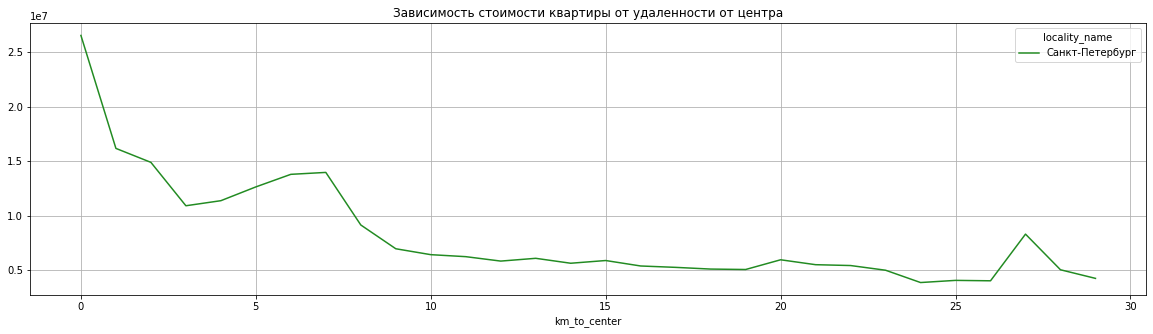

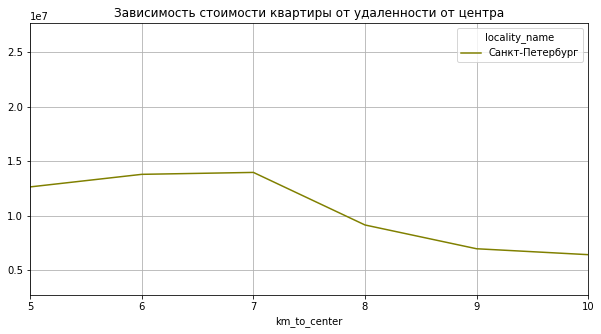

In [227]:
display(spb_pivot.plot(title='Зависимость стоимости квартиры от удаленности от центра', 
                       grid=True, 
                       figsize=(20,5),
                      color='forestgreen'))
display(spb_pivot.plot(title='Зависимость стоимости квартиры от удаленности от центра', 
                       xlim=(5,10), 
                       grid=True, 
                       figsize=(10,5),
                      color='olive'))

**Вывод:** Граница центра Санкт-Петербурга находится в радиусе 8 км.

## Анализ квартир в центре Санкт_Петербурга

Выделим сегмент квартир в центре Санкт-Петербурга в отдельный датасет при помощи среза данных, выполненного методом query().
Зададим диапазон от 0 до 8 км.

In [187]:
spb_center = data_spb.query('km_to_center<9')

При помощи метода decribe() получим данные о следующих параметрах:

площадь, цена, число комнат, высота потолков для квартир в центре Санкт_петербурга.

In [188]:
spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,"4,050.00","4,050.00","4,050.00","4,050.00"
mean,87.23,"12,497,599.85",2.70,2.91
std,50.49,"11,664,538.41",1.27,0.35
min,12.00,"1,600,000.00",0.00,2.00
25%,54.70,"6,400,000.00",2.00,2.65
50%,75.35,"8,895,000.00",3.00,2.79
75%,105.00,"13,500,000.00",3.00,3.10
max,517.00,"99,000,000.00",7.00,5.80


In [189]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,"23,468.00","23,468.00","23,468.00","23,468.00"
mean,59.64,"6,221,434.09",2.06,2.70
std,32.44,"6,354,973.57",1.03,0.22
min,12.00,"12,190.00",0.00,2.00
25%,40.00,"3,400,000.00",1.00,2.60
50%,52.00,"4,600,000.00",2.00,2.65
75%,69.30,"6,750,000.00",3.00,2.70
max,517.00,"99,000,000.00",7.00,5.80


**Вывод:** по данным сводной таблицы видно, что в центре Санкт-Петербурга цены на основную часть квартир лежат в пределах от 6,4 млн. руб. до 13,5 млн. рублей.

Цены на основную часть квартир в Ленинградской области находятся в диапазоне 3,4-6,75 млн.руб.

Для каждого параметра построим гистограммы.

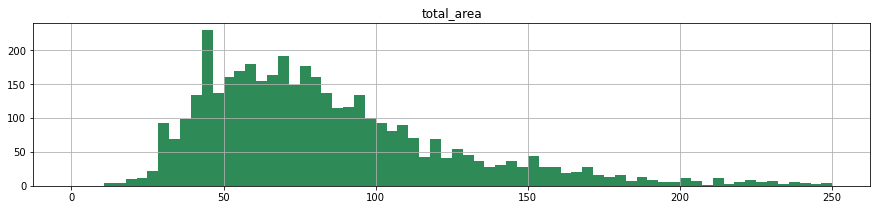

In [213]:
spb_center.hist('total_area',
                bins=70, 
                range=(0,250), 
                figsize=(15,3),
               color='seagreen');

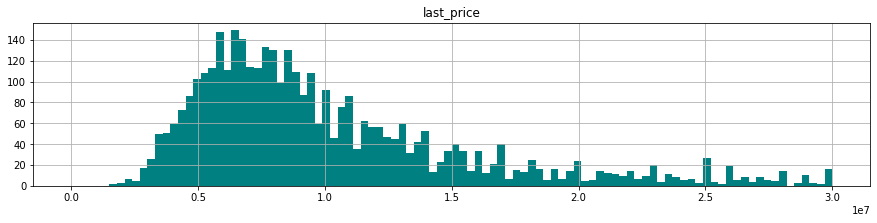

In [234]:
spb_center.hist('last_price',
                bins=100, 
                range=(0, 30000000), 
                figsize=(15,3),
                color='teal');

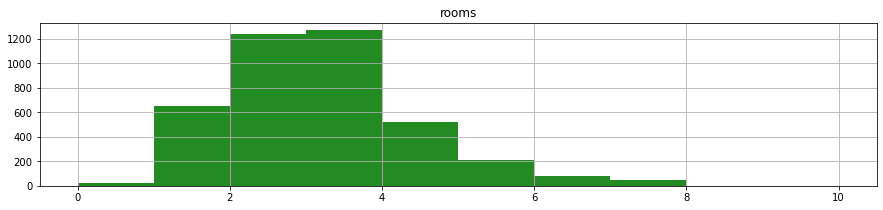

In [236]:
spb_center.hist('rooms',
                bins=10, 
                range=(0,10), 
                figsize=(15,3),
                color='forestgreen');

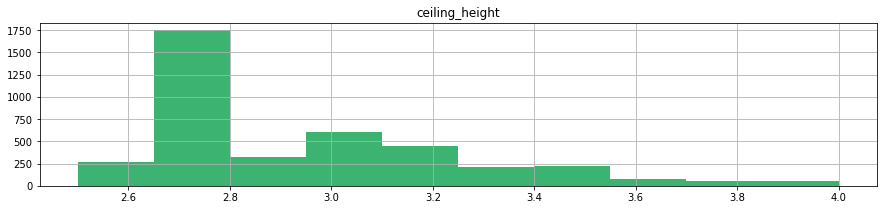

In [237]:
spb_center.hist('ceiling_height',
                bins=10, 
                range=(2.5,4), 
                figsize=(15,3),
                color='mediumseagreen');

**Вывод:** в результате анализа видно, что для большинства квартир характерны следующие параметры (в скобках приведены данные по Ленинградской области):

общая площадь около 75,35 кв.м (52 кв.м);
цена около 8,895 млн. руб. (4,6 млн. руб.);
количество комнат 3 (2);
высота потолков 2,79 м (2,65 м).

**Сравнение:**

Медианное значение площади квартир в центре города на 23,35 кв.м превышает значение по всей области,
медианное значение стоимости квартиры отличается почти в 2 раза,
количество комнат 3 против 2,
высота потолков на 14 см больше.

<div class="alert alert-success">
<b>Комментарий ревьюера v2 ✔️:</b>
    
Верно</div>

## Время продажи квартиры

Изучим время продажи квартиры

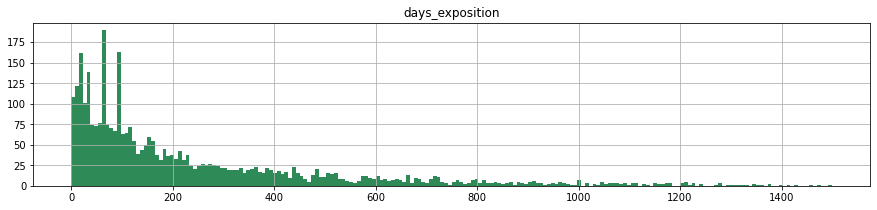

In [214]:
spb_center.hist('days_exposition', 
                bins=200, 
                range=(0, 1500), 
                figsize=(15,3),
               color='seagreen');

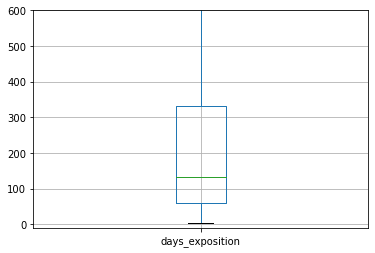

In [195]:
spb_center.boxplot('days_exposition')
plt.ylim(-10, 600);

In [70]:
spb_center[['days_exposition']].describe()

,days_exposition
count,"3,397.00"
mean,239.32
std,270.09
min,3.00
25%,59.00
50%,133.00
75%,332.00
max,"1,572.00"


По диаграмме размаха видно, что большинство квартир в центре Санкт-Петербурга продается в период от 59 до 332 дней.

((Также имеются выбросы и выбивающиеся значения: продажи, длившиеся более 500 дней (их доля мала). Избавимся от них.))

**Вывод:** большинство квартир в центре Санкт-Петербурга продается в период от 59 до 332 дней. Медианное значение: 133 дня.
Если квартира продана быстрее, чем за 59 дней, можно считать, что продажа прошла очень быстро. Продажи, занявшие более 332 дней можно считать достаточно долгими.

**Сравнение:**
большинство квартир в Ленинградской области продается в период от 45 до 230 дней, медианное значение: 95 дней.
Получается, что квартиры в центре города продаются медленнее, чем во всей области. Возможно, это связано с высокой ценой на квартиры в центре.

## Общий вывод

 **Предобработка данных**
 
На этапе предобработки данных были обнаружены и обработаны пропущенные значения. 
В столбцах 'balcony' и 'parks_around3000' пропуски заменены на 0 (пропуск, скорее всего, означают отсутствие балконов или парков)
В столбце 'is_apartment' —  на False (видимо, если это не указано, объект не является аппартаментами).
Удалены строки с пропусками в столбце'locality_name'  и 'floors_total' (данные этих столбцов важны для исследования, а доля пропусков мала).
В столбце 'ceiling_height' было обнаружено много пропусков, которые были заменены на медианное значение, поскольку это значение наиболее приближено к реальным данным.

Заменены типы данных в столбцах:
'is_apartment' на bool (в столбце содержаться только два типа значений True и False);
'first_day_exposition' на datetime, чтобы дата отображалась в более удобном формате.

**Расчёты и добавление результатов в таблицу**

Для выполнения исследования в таблицу были добавлены следующие значения:
стоимость квадратного метра;
день, месяц и год размещения объявления,
категория этажа (первый, последний, другой)

**Исследовательский анализ данных и выводы:**

Факторы больше всего влияющие на стоимость квартиры:

1. площадь: прослеживается зависимость роста цены с ростом площади, однако видно также большое рассеяние цен, означающее, что есть небольшие дорогие квартиры и есть большие дешевые;

2. количество комнат: цены на квартиры с бОльшим количестом комнат выше, более резко возрастают цены на квартиры, в которых больше 4х комнат;

3. этаж: самые низкие цены на квартиры, расположенные на первом этаже, на квартиры на последнем этаже цены чуть выше, на других этажах цены выше;
    
4. даты размещения объявления (день недели, месяц и год): 
    а) максимальные цены у квартир, объявления о продаже которых размещены в субботу и понедельниик, миниальная стоимость - во вторник и воскресенье; возможно, такая закономерность связана с тем, что объявления обычно размещаются в первый рабочий день недели и первый выходной день, на следующий день заметно резкое падение цен;
    б) наблюдается снижение стоимости квартир к июню и рост цен к концу года в ноябре и декабре;
    в) с каждым годом наблюдается повышение стоимости квадратного метра квартир, также заметно, что скорость роста цен также цвеличивается.

Населенный пункт с самой высокой ценой за квадратный метр: Санкт-Петербург (113627 руб.)
Населенный пункт с самой низкой ценой за квадратный метр: Выборг (57591 руб.)

При сравнении квартир в центре и в области получены следующие результаты:
1. медианное значение площади квартир в центре города на 23,35 кв.м превышает значение по всей области;
2. медианное значение стоимости квартиры отличается почти в 2 раза;
3. медианное значение числа комнат - 3 в квартирах центре против 2 в квартирах в области;
4. высота потолков на 14 см больше в квартирах в центре.
5. квартиры в центре города продаются медленнее, чем во всей области. Возможно, это связано с высокой ценой на квартиры в центре.
